<a href="https://colab.research.google.com/github/akipips/simosaka_final/blob/master/%E5%95%8F%E9%A1%8C7/problem7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def st_ops(mu, q):
  x_proj = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > q:
      x_proj[i] = mu[i] - q
    else:
      if np.abs(mu[i]) < q:
        x_proj[i] = 0
      else:
        x_proj[i] = mu[i] + q
  return x_proj

Adam

In [31]:
def Adam():
    x_1 = np.arange(-1.5, 3, 0.01)
    x_2 = np.arange(-1.5, 3, 0.02)

    fValue = np.zeros((len(x_1), len(x_2)))

    A = np.array([[250, 15],
                  [15, 4]])
    mu = np.array([[1],
                   [2]])
    lam = 0.89

    for i in range(len(x_1)):
        for j in range(len(x_2)):
            inr = np.vstack([x_1[i], x_2[j]])
            fValue[i, j] = np.dot(np.dot((inr - mu).T, A), (inr - mu)) + lam * (np.abs(x_1[i]) + np.abs(x_2[j]))

    x_init = np.array([[3],
                       [-1]])
    xt = x_init

    x_history = []
    g_history = []
    fvalues = []

    b1 = 0.7
    b2 = 0.99999
    ee = 1.0e-8
    aa = 0.2
    mm = np.zeros((2, 1))
    vv = np.zeros((2, 1))

    for t in range(1, 101):
        x_history.append(xt.T)
        grad = 2 * np.dot(A, xt - mu)

        mm = b1 * mm + (1 - b1) * grad
        vv = b2 * vv + (1 - b2) * (grad * grad)

        mmHat = mm / (1 - b1 ** t)
        vvHat = vv / (1 - b2 ** t)

        g_history.append(grad.T)

        rateProx = aa * np.ones((2, 1)) / (np.sqrt(vvHat) + ee)

        xth = xt - mmHat * rateProx

        xt = np.array([st_ops(xth[0], lam * rateProx[0]),
                       st_ops(xth[1], lam * rateProx[1])])

        fv = np.dot(np.dot((xt - mu).T, A), (xt - mu)) + lam * (np.abs(xt[0]) + np.abs(xt[1]))
        fvalues.append(fv)

    x_history = np.vstack(x_history)
    fvalues = np.vstack(fvalues)
    fvalues = fvalues.flatten()
    fvalues -= fvalues[len(fvalues)-1]
    fvalues = np.delete(fvalues, len(fvalues) - 1)
    return fvalues

Adagrad

In [32]:
def Adagrad():
    x_1 = np.arange(-1.5, 3, 0.01)
    x_2 = np.arange(-1.5, 3, 0.02)

    fValue = np.zeros((len(x_1), len(x_2)))

    A = np.array([[250, 15],
                  [15, 4]])
    mu = np.array([[1],
                   [2]])
    lam = 0.89

    for i in range(len(x_1)):
        for j in range(len(x_2)):
            inr = np.vstack([x_1[i], x_2[j]])
            fValue[i, j] = np.dot(np.dot((inr - mu).T, A), (inr - mu)) + lam * (np.abs(x_1[i]) + np.abs(x_2[j]))

    x_init = np.array([[3],
                       [-1]])
    xt = x_init
    L = 1.01 * np.max(np.linalg.eig(2 * A)[0])
    eta0 = 300 / L
  
    x_history = []
    g_history = []
    fvalues = []

    delta = 0.02

    for t in range(100):
        x_history.append(xt.T)
        grad = 2 * np.dot(A, xt - mu)

        g_history.append(grad.flatten().tolist())
        ht = np.sqrt(np.sum(np.array(g_history) ** 2, axis=0).T) + delta
        ht = ht.reshape(2, 1)

        eta_t = eta0
        xth = xt - eta_t * (ht ** -1 * grad)
        ht_inv = ht ** -1
        xt = np.array([st_ops(xth[0], lam * eta_t * ht_inv[0]),
                       st_ops(xth[1], lam * eta_t * ht_inv[1])])

        fv = np.dot(np.dot((xt - mu).T, A), (xt - mu)) + lam * (np.abs(xt[0]) + np.abs(xt[1]))
        fvalues.append(fv)

    x_history = np.vstack(x_history)
    fvalues = np.vstack(fvalues)

    fvalues = fvalues.flatten()
    fvalues -= fvalues[len(fvalues) - 1]
    fvalues = np.delete(fvalues, len(fvalues) - 1)

    return fvalues

RMSProp


In [33]:
def RMSProp():
    x_1 = np.arange(-1.5, 3, 0.01)
    x_2 = np.arange(-1.5, 3, 0.02)

    fValue = np.zeros((len(x_1), len(x_2)))

    A = np.array([[250, 15],
                  [15, 4]])
    mu = np.array([[1],
                   [2]])
    lam = 0.89

    for i in range(len(x_1)):
        for j in range(len(x_2)):
            inr = np.vstack([x_1[i], x_2[j]])
            fValue[i, j] = np.dot(np.dot((inr - mu).T, A), (inr - mu)) + lam * (np.abs(x_1[i]) + np.abs(x_2[j]))

    x_init = np.array([[3],
                       [-1]])
    xt = x_init

    x_history = []
    g_history = []
    fvalues = []

    hh = np.zeros((2, 1))
    ler = 0.1
    alpha = 0.95

    for t in range(1, 101):
        x_history.append(xt.T)
        grad = 2 * np.dot(A, xt - mu)

        hh = alpha * hh + (1-alpha) * (grad*grad)
        g_history.append(grad.T)
        tmpler = ler/(np.sqrt(hh)+1e-6)
        xth = xt - grad * tmpler

        xt = np.array([st_ops(xth[0], lam * tmpler[0]),
                       st_ops(xth[1], lam * tmpler[1])])

        fv = np.dot(np.dot((xt - mu).T, A), (xt - mu)) + lam * (np.abs(xt[0]) + np.abs(xt[1]))
        fvalues.append(fv)

    x_history = np.vstack(x_history)
    fvalues = np.vstack(fvalues)

    fvalues = fvalues.flatten()
    fvalues -= fvalues[len(fvalues) - 1]
    fvalues = np.delete(fvalues, len(fvalues) - 1)

    return fvalues

AdaDelta


In [34]:
def AdaDelta():
    x_1 = np.arange(-1.5, 3, 0.01)
    x_2 = np.arange(-1.5, 3, 0.02)

    fValue = np.zeros((len(x_1), len(x_2)))

    A = np.array([[250, 15],
                  [15, 4]])
    mu = np.array([[1],
                   [2]])
    lam = 0.89

    for i in range(len(x_1)):
        for j in range(len(x_2)):
            inr = np.vstack([x_1[i], x_2[j]])
            fValue[i, j] = np.dot(np.dot((inr - mu).T, A), (inr - mu)) + lam * (np.abs(x_1[i]) + np.abs(x_2[j]))


    x_init = np.array([[3],
                       [-1]])
    xt = x_init

    lo = 0.99999
    eps = 1e-6

    x_history = []
    fvalues = []

    hh = np.zeros((2, 1))
    ss = np.zeros((2, 1))

    for t in range(1, 101):
        x_history.append(xt.T)

        grad = 2 * np.dot(A, xt - mu)

        hh = lo * hh + (1-lo) * grad**2
        rateProx = np.sqrt((ss + eps)/(hh + eps))
        vv = rateProx * grad
        ss = lo * ss + (1-lo) * vv**2

        xth = xt - vv

        xt = np.array([st_ops(xth[0], lam * rateProx[0]),
                       st_ops(xth[1], lam * rateProx[1])])

        fv = np.dot(np.dot((xt - mu).T, A), (xt - mu)) + lam * (np.abs(xt[0]) + np.abs(xt[1]))
        fvalues.append(fv)

    x_history = np.vstack(x_history)
    fvalues = np.vstack(fvalues)

    fvalues = fvalues.flatten()
    fvalues -= fvalues[len(fvalues) - 1]
    fvalues = np.delete(fvalues, len(fvalues) - 1)

    return fvalues

Nadam


In [35]:
def Nadam():
    A = np.array([[250, 15],
                  [15, 4]])
    mu = np.array([[1],
                   [2]])
    lam = 0.89

    x_init = np.array([[3],
                       [-1]])
    xt = x_init

    x_history = []
    fvalues = []
    m_t = np.zeros((2, 1))
    v_t = np.zeros((2, 1))
    mu_p = 0.5
    eps = 1e-16
    ups = 0.99999
    lr = 0.2

    for t in range(1, 101):
        x_history.append(xt.T)

        g_t = 2 * np.dot(A, xt - mu)
        mu_t = mu_p * (1 - mu_p ** (t - 1)) / (1 - mu_p ** t)
        mu_tp1 = mu_p * (1 - mu_p ** t) / (1 - mu_p ** (t + 1))
        ups_t = ups * (1 - ups ** (t - 1)) / (1 - ups ** t)
        m_t = mu_t * m_t + (1 - mu_t) * g_t
        mbar_t = mu_tp1 * m_t + (1 - mu_t) * g_t
        v_t = ups_t * v_t + (1 - ups_t) * g_t ** 2

        vbar_t = np.sqrt(v_t) + eps

        s_t = lr * mbar_t / vbar_t
        rateProx = lr / vbar_t
        xth = xt - s_t

        xt = np.array([st_ops(xth[0], lam * rateProx[0]),
                       st_ops(xth[1], lam * rateProx[1])])

        fv = np.dot(np.dot((xt - mu).T, A), (xt - mu)) + lam * (np.abs(xt[0]) + np.abs(xt[1]))
        fvalues.append(fv)

    x_history = np.vstack(x_history)
    fvalues = np.vstack(fvalues)

    fvalues = fvalues.flatten()
    fvalues -= fvalues[len(fvalues) - 1]
    fvalues = np.delete(fvalues, len(fvalues) - 1)

    return fvalues

実装終了

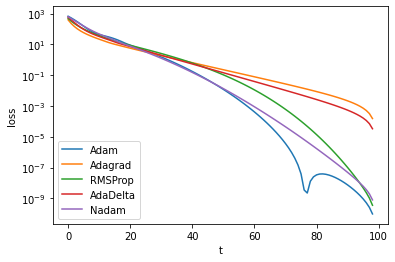

In [36]:
#(3)比較

plt.semilogy(Adam(), markersize=0.5, label='Adam')
plt.semilogy(Adagrad(), markersize=0.5,label='Adagrad')
plt.semilogy(RMSProp(), markersize=0.5,label='RMSProp')
plt.semilogy(AdaDelta(), markersize=0.5,label='AdaDelta')
plt.semilogy(Nadam(),  markersize=0.5, label='Nadam')
plt.xlabel("t")
plt.ylabel("loss")
plt.legend()